# Applications for C++

## g++

### Install g++ compiler

* https://sourceforge.net/projects/mingw/
Install MinGW

* Install mingw32-gccg++-bin

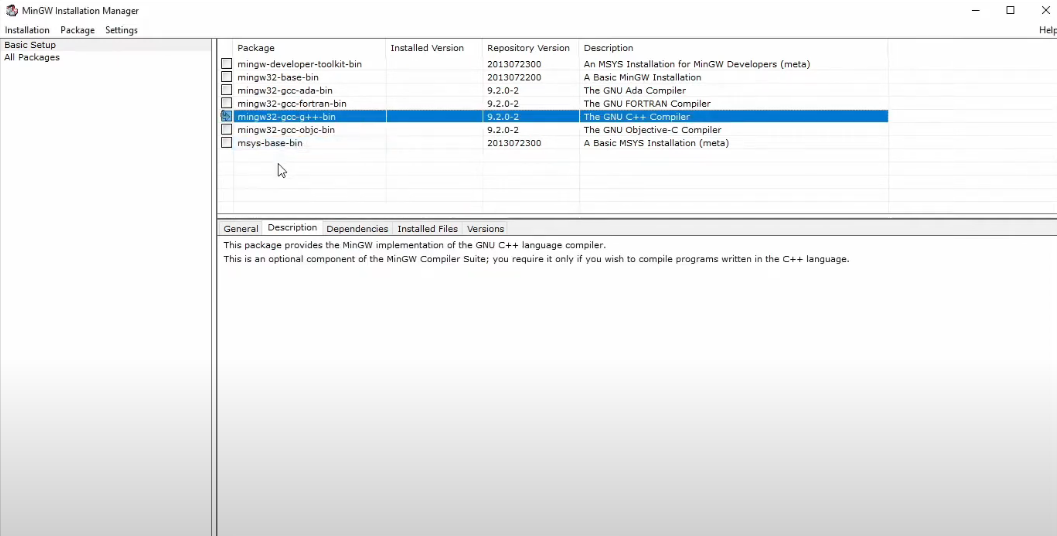

Top left -> Installation -> Apply Changes

* Then, open environment variables in windows

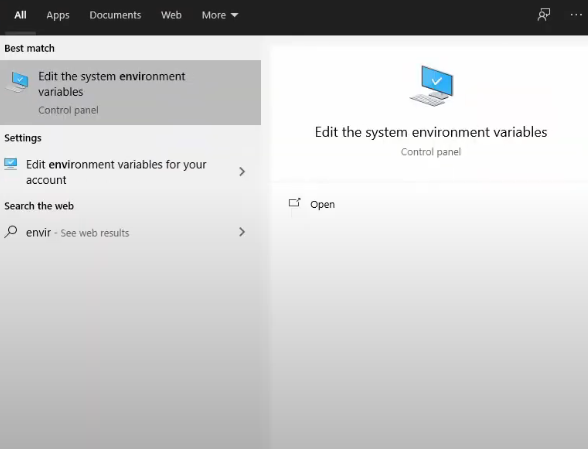

* Add MinGW\bin to path

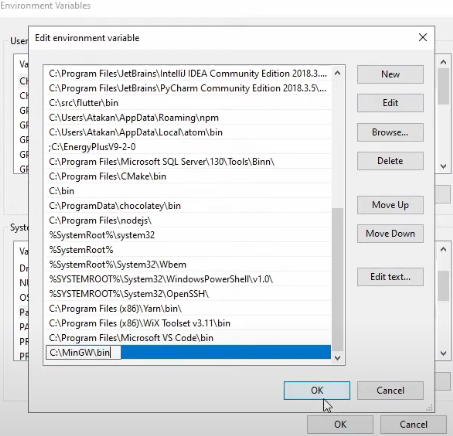

* Check if g++ is installed by running 'g++ -v' in terminal

### g++

### Compile
Creates a file .o

In [ ]:
g++ -c -Wall -Wextra 'file'

### Link

In [ ]:
g++ -o 'executable file name' 'file with .o'

### Execute

In [ ]:
./'file name with .exe'

All in one

In [ ]:
g++ -Wall -Wextra -o <name of o file to be generated> <name of .cc file>

In [ ]:
g++ -Wall -Wextra -o sq sq.cc

### Correct workflow
A class file:       list.h
Member functions:   list.cc
Main function:      ltest.cc

In [ ]:
g++ -c list.cc -std=c++11
g++ -c ltest.cc -std=c++11
g++ -o ltest ltest.o list.o
./ltest

The -c option directs the driver to stop before the linking phase and produce an object file.

gcc also supports giving multiple source files in the same command. Then, that
means to both compile and link.

In [ ]:
g++ -std=c++11 -o ltest ltest.cc list.cc

Otherwise, if the files are already compiled and .o files are produced, using the above code links the file.

In [ ]:
g++ -std=c++11 -o ltest ltest.o list.o

Header files are not included in the g++ command line – they are inserted by
the preprocessor #include directives

### g++ options

In [ ]:
-c                  just compile
-02                 optimize the object code

                    Be aware that optimization takes time, and on a slow
                    machine you may wish to remove this flag during development to save compilation time. Another
                    reason for compiling without optimization is to facilitate debugging

-Wall               print most warnings
-Wextra             print extra warnings
-pedantic-errors    produce errors for using non-standard language extensions
-Wold-style-cast    warn for old-style casts
-std=c++11          follow the C++-11 standard
-Werror             treat warnings as errors (highly recommended)

### g++ error messages

#### undefined reference to ...
Linker error

## Sanitizer (g++)
Catches memory errors or undefined behavior

In [ ]:
-fsanitize=<option> Catches memory errors or undefined behavior, options can be address (memory leaks, buffer overflow), undefined (division by zero, dereferencing null pointers, out-of-bounds array access)

In [ ]:
stack-buffer-overflow   // accessing memory outside valid bounds
heap-buffer-overflow    // same, but for heap
heap-use-after-free     // accessing memory after it has been freed


## WSL

Installation:
Make sure virtualization is turned on in BIOS.

In [ ]:
wsl --install

Restart pc, start Ubuntu from Start and create a unix account.
Good habit to find the path for git repositories and save in a text file.

## GNU make

Automates some bash according to a MakeFile.

Running a make file:
make automatically searches for 'Makefile' as default, and runs targets inside that script. If using -f option, it is specified which file to use.

Example:

In [ ]:
.PHONY: all clean

all: program
	echo "Building program"

program:
	gcc -o program main.c  # Replace with your actual build command

clean:
	rm -f program
	echo "Cleaned up"

If this code is inside Makefile, then using:

In [ ]:
make clean

GNU make will automatically search for the default make file name Makefile and the target clean.

If you want to target a specific Makefile, use:

In [ ]:
make -f <makefile name>

### Create make file

In [ ]:
touch Makefile

### Makefile template

In [ ]:
CC = g++
CFLAGS = -Wall -Wextra -MMD -g #compile options
SRCS = example.cc ... # write .cc files here
OBJS = $(SRCS:.cc=.o)
DEPS = $(SRCS:.cc=.d)

# Build the executable
program: $(OBJS)
	$(CC) -o <.exe name> $(OBJS)
	# if you want to, add the execute of the .exe
	./<exe name>

# Compile source files
%.o: %.cc
	$(CC) $(CFLAGS) -c $< -o $@

# Include the dependency files if they exist
-include $(DEPS)

# Clean rule
.PHONY: clean
clean:
	rm -f $(OBJS) $(DEPS) <.exe name>

Exempel:

In [ ]:
# Build the executable
PROGS =  hello run      // inkludera alla targets som ska hanteras, detta fallet hello och run, som hanteras var för sig, en i taget
all: $(PROGS)

hello: hello.o          // utfärdar target .o om den finns, annars utfärdar targeten istället
	g++ -o hello hello.o

hello.o: hello.cc       // utfärdar koden om hello.cc finns
	$(CC) -c hello.cc

run: hello              // i PROGS så har nu allt för hello lyckats köra, nästa target är run, som utfärdar själva exekveringen
	./hello

print_argv: print_argv.o

# Phony targets
.PHONY: all test clean distclean

### Work with all available .cpp files

In [ ]:
SRCS = $(wildcard *.cpp)  # Automatically finds all .cpp files

### make run options

In [ ]:
make -f <file>  // run file
make -B         // unconditionally make all targets
make -C dir     // change to directory dir and run make there. Useful to recurse into subdirectories.
make -n         // Just print the commands that would be executed but do not execute them.

### If this older than that, then ->

In [ ]:
# The following rule means: "if ltest does not exist, or
# is older than ltest.o or list.o,
# then link ltest".
ltest: ltest.o list.o
	g++ -o ltest ltest.o list.o

### Some coding stuff

In [ ]:
Example:
PROGS = bounds dangling leak sum ub bounds-heap
$(PROGS:=.cc)   // adds .cc to every name in PROGS
$(PROGS:.cc)    // removes .cc from every name in PROGS

## GNU GDB
A GNU based debugger for C++

How to Install GDB?
There are two ways you can install GDB on your linux machine.

1. Install pre-built gdb binaries from verified distribution resources
You can install gdb on Debian-based linux distro (e.g. Ubuntu, Mint, etc) by following command.


In [ ]:
$ sudo apt-get update
$ sudo apt-get install gdb


2. Download source code of GDB, compile it and install.
Follow below mentioned steps to compile GDB from scratch and install it.
Step-1: Download source code.
You can download source code of all release from http://ftp.gnu.org/gnu/gdb/


In [ ]:
$ wget "http://ftp.gnu.org/gnu/gdb/gdb-7.11.tar.gz"

Step-2: Extract it

In [ ]:
$ tar -xvzf gdb-7.11.tar.gz


Step-3: Configure and Compile it.
This step will take a bit of time. So you can sit back and have cup of coffee for a while.
Once it is completed, you can locate gdb binary located at gdb-7.11/gdb/gdb


In [ ]:
$ cd gdb-7.11
./configure
make

Step-4: Install GDB. 

In [ ]:
make install

By default this will install gdb binaries in /usr/local/bin and libs in /usr/local/lib
Congratulation, you have successfully compiled and installed GDB. Once you installed GDB, you can print GDB version to test whether it is installed correctly.


In [ ]:
$ gdb --version

#### Start GDB

In [ ]:
gdb

Or with the text-user interface:

In [ ]:
gdb
<Press CTRL-X then 'a'>

Another way to enable text-user interface:

In [ ]:
tui enable
tui disable

#### Execute debugger
First compile using -g, example:

Two files, list.cc and ltest.cc

In [ ]:
g++ -g -c list.cc
g++ -g -c ltest.cc
g++ -g -o ltest ltest.o list.o
gdb ltest

Or:

In [ ]:
gdb --args program

Where --args are some command line arguments

### Breakpoints

#### Set breakpoint

In [ ]:
break <function name>
break <line number>

#### List breakpoints

In [ ]:
info break

#### Enable, disable or delete

In [ ]:
enable
disable
delete

#### breakpoint commands

In [ ]:
commands

#### breakpoint conditions

In [ ]:
cond

#### Start debugging

In [ ]:
run                 //starts debugger
step
next
continue            // continues until next breakpoint
print <variable>    // prints variable values

### Print variables

In [ ]:
info locals     // local variables
info variables  // global variables

## GNU CMake
Easier version of make, generates appropriate Makefile automatically
Install:

In [ ]:
sudo apt-get install cmake

### Auto-generate Makefile

We want to generate a Makefile for our .cpp program. In this example, we have only one .cpp file named main.cpp that we want to process.

First, create a .txt file named 'CMakeLists.txt' and include the following code:

In [ ]:
cmake_minimum_required(VERSION 3.10)
set(CMAKE_CXX_STANDARD 17)
set(CMAKE_CXX_STANDARD_REQUIRED ON)

project(hello VERSION 1.0)
add_executable(hello main.cpp)

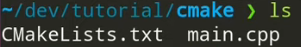

Then, we run in command line:

In [ ]:
cmake .

Which generates the appropriate files.

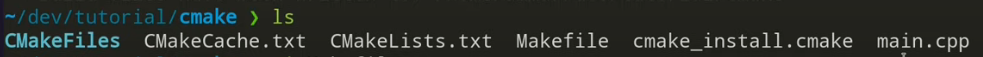

### Create different builds
Interpret the location of the CMakeLists.txt as the source code location. To organize builds of the code:

In [ ]:
mkdir build     // directory of your build
cd build
cmake ../       // execute the cmake in the source directory, but in your current build

This way, you can organize your different builds.

### Header file directory
To separate source code from header files, include the following in the CMakeLists.txt:

In [ ]:
target_include_directories(hello PUBLIC ${CMAKE_CURRENT_SOURCE_DIR}/include)

### Multiple source files
First, create a source directory and move source code there.

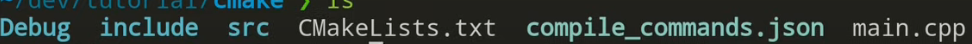

Then, include the following in the CMakeLists.txt

In [ ]:
file(GLOB_RECURSE SRC_FILES src/*.cpp)

This recursively stores .cpp files in src inside SRC_FILES. Lastly, change the 'add_executable' to include SRC_FILES

In [ ]:
add_executable(hello ${SRC_FILES})

### Create libraries
In this example, we have main.cpp which includes Blah.cpp. To separate all the different dependencies into their own directories, library directories can be created and added inside CMakeLists.txt.

Complete CMakeLists.txt:

In [ ]:
cmake_minimum_required(VERSION 3.10)
set(CMAKE_CXX_STANDARD 17)
set(CMAKE_CXX_STANDARD_REQUIRED ON)

project(hello VERSION 1.0)

add_library(blah STATIC blah/Blah.cpp)                                               // add library, 'blah' is target name only for CMake
target_include_directories(blah PUBLIC ${CMAKE_CURRENT_SOURCE_DIR}/blah/include)     // include the headers for the new library, blah knows its targets

add_executable(hello main.cpp)
target_link_libraries(hello PUBLIC blah)    // link the executable with the library

### Let libraries use their own CMakeLists.txt
Just for simplicity. Compare to before:

In [ ]:
cmake_minimum_required(VERSION 3.10)
set(CMAKE_CXX_STANDARD 17)
set(CMAKE_CXX_STANDARD_REQUIRED ON)

project(hello VERSION 1.0)

add_library(blah STATIC blah/Blah.cpp)
target_include_directories(blah PUBLIC ${CMAKE_CURRENT_SOURCE_DIR}/blah/include)

add_executable(hello main.cpp)
target_link_libraries(hello PUBLIC blah) 

After:

Inside the source directory:

In [ ]:
cmake_minimum_required(VERSION 3.10)
set(CMAKE_CXX_STANDARD 17)
set(CMAKE_CXX_STANDARD_REQUIRED ON)

project(hello VERSION 1.0)

add_subdirectory(blah)

add_executable(hello main.cpp)
target_link_libraries(hello PUBLIC blah) 

Inside the library:

In [ ]:
add_library(blah STATIC blah/Blah.cpp)
target_include_directories(blah PUBLIC ${CMAKE_CURRENT_SOURCE_DIR}/blah/include)

### Old guide

#### Simple cmake for builds
First, separate the main program and put dependencies into a library. The main program will contain following CMakeList.txt:

In [ ]:
cmake_minimum_required (VERSION 3.5)
project (Simple)
set (CMAKE_CXX_STANDARD 11)

# set build type to DEBUG
set(CMAKE_BUILD_TYPE Debug)
# or to get an optimized build w/ debug symbols
# set(CMAKE_BUILD_TYPE RelWithDebInfo)

# add the library to the include file search path
include_directories ("${PROJECT_SOURCE_DIR}/testlib")

add_subdirectory (testlib) 

# set compiler and linker flags
add_compile_options("-Og")
#add_compile_options("-fsanitize=address")
#link_libraries("-fsanitize=address")

# add the executable SimpleMain and its dependency on TestLib
add_executable(SimpleMain main.cc)
target_link_libraries (SimpleMain TestLib)

##################### Optional features below this line ############

# The version number. This is not needed but included
# to show how information can be passed from CMakeLists.txt
# to the program.
set (Simple_VERSION_MAJOR 1)
set (Simple_VERSION_MINOR 0)

# configure a header file to pass some of the CMake settings
# to the source code. Only needed if we want to pass some
# information or configuration from Cmake to the program 
# being built.
configure_file (
  "${PROJECT_SOURCE_DIR}/SimpleConfig.h.in"
  "${PROJECT_BINARY_DIR}/SimpleConfig.h"
  )

# add the binary tree to the search path for include files
# so that we will find SimpleConfig.h
include_directories("${PROJECT_BINARY_DIR}")

The dependencies in their own library, will have this CMakeLists.txt:

In [ ]:
add_library(<library name> <cc file 1> <cc file 2>)

Then, go back into the directory where main program is located, and run following:

In [ ]:
mkdir <build name> && cd <build name>
cmake ..
make

#### Release build

Create following CMakeLists.txt:

In [ ]:
# An example CMakeLists.txt for the sanitizers example, showing how to
# enable sanitizers in a debug build.
# It uses generator expressions, to set additional flags when the build type
# is Debug.
#
# To try this out, first create a build directory for a release build, 
# and do a release build, e.g.,
# % mkdir build-rel
# % cd build-rel
# % cmake SRC_DIR -DCMAKE_BUILD_TYPE=Release
# % make
#
# Run the examples and see that they crash.
#
# Then create another build directory and do a debug build:
#
# % mkdir build-dbg
# % cd build-dbg
# % cmake SRC_DIR -DCMAKE_BUILD_TYPE=Debug
# % make
#
# where SRC_DIR is the directory containing the source and CMakeLists.txt,
# e.g., .. if your build directories are placed in this directory.
# 
# Run the examples and verify that the sanitizers find the errors.
#
# If you want to see the actual commands run during the build, for instance
# to verify that the correct compiler flags are used, you can do
#
# % make VERBOSE=1


cmake_minimum_required (VERSION 3.5)
project (Sanitizers)
set (CMAKE_CXX_STANDARD 11)

# The three standard build types are Release, Debug, and RelWithDebInfo.
# If set here, it forces that build type.
#
# set(CMAKE_BUILD_TYPE Release)
# set build type to DEBUG
# set(CMAKE_BUILD_TYPE Debug)
# or to get an optimized build w/ debug symbols
# set(CMAKE_BUILD_TYPE RelWithDebInfo)

# add the executables
add_executable(leak leak.cc)
add_executable(bounds bounds.cc)
add_executable(bounds-heap bounds-heap.cc)
add_executable(ub ub.cc)
add_executable(dangling dangling.cc)
add_executable(sum sum.cc)
add_executable(sum_alt sum.cc)

# set compiler flag to turn off optimization (for all builds)
# add_compile_options("-O0")
# or use generator expressions to set flags in debug builds
add_compile_options($<$<CONFIG:Debug>:-O0>)

# set compiler and linker flags to enable the relevant sanitizer
target_compile_options(leak PUBLIC $<$<CONFIG:Debug>:-fsanitize=leak>)
target_link_libraries(leak $<$<CONFIG:Debug>:-fsanitize=leak>)

target_compile_options(bounds PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(bounds $<$<CONFIG:Debug>:-fsanitize=address>)

target_compile_options(bounds-heap PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(bounds-heap $<$<CONFIG:Debug>:-fsanitize=address>)

target_compile_options(ub PUBLIC $<$<CONFIG:Debug>:-fsanitize=undefined>)
target_link_libraries(ub $<$<CONFIG:Debug>:-fsanitize=undefined>)

target_compile_options(dangling PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(dangling $<$<CONFIG:Debug>:-fsanitize=address>)

target_compile_options(sum PUBLIC $<$<CONFIG:Debug>:-fsanitize=undefined>)
target_link_libraries(sum $<$<CONFIG:Debug>:-fsanitize=undefined>)

target_compile_options(sum_alt PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(sum_alt $<$<CONFIG:Debug>:-fsanitize=address>)

In [ ]:
% mkdir build-dbg
% cd build-dbg
% cmake SRC_DIR -DCMAKE_BUILD_TYPE=Debug    // SRC_DIR = .. if its one directory above
% make

#### Debug build
Same CMakeLists.txt as above.

In [ ]:
% mkdir build-dbg
% cd build-dbg
% cmake SRC_DIR -DCMAKE_BUILD_TYPE=Debug
% make

## Valgrind
Helps finding memory-related errors at precise locations. Note: don't compile with sanitizers

In [ ]:
sudo apt-get install valgrind

Run:

In [ ]:
valgrind ./<.exe file>

# Notes

## Keep in mind

### Deciding which sequential container to use
### Deciding which sequential container to use
* Unless you have a reason to use another container, use a vector
* If your program has lots of small elements and space overhead matters, don't use list or forward_list
* If the program requires random access to elements, use a vector or a deque.
* If the program needs to insert or delete elements in the middle of the container, use a list or forward_list.
* If the program needs to insert or delete elements at the front and the back, but not in the middle, use a deque.
* If the program needs to insert elements in the middle of the container only while reading input, and subsequently needs random access to the elements:
- First, decide whether you actually need to add elements in the middle
 of a container. It is often easier to append to a vector and then call
 the library sort function (which we shall cover in § 10.2.3 (p. 384)) to
 reorder the container when you’re done with input.
- If you must insert into the middle, consider using a list for the input
 phase. Once the input is complete, copy the list into a vector.

## excercise 1

### enum from C used in C++
Traditional enum from C is convertible to int, which can lead to unintended behavior. For example:

In [ ]:
enum Color { RED, GREEN, BLUE };
enum Status { SUCCESS, FAILURE };

Color c = GREEN;
if (c == SUCCESS) {  // No compiler error, but it's semantically incorrect
    // Logic error
}

enum from C also uses values that exist in the surrounding namespace, for example:

In [ ]:
enum Color { RED, GREEN, BLUE };
enum Status { SUCCESS, FAILURE, RED }; // Error: 'RED' is already defined

Solution: use enum class in C++. The enum class in C++ has no implicit conversion to int, and uses scoped names, and underlying types can be specified.

## excercise 2

### function which calls by value
Example with a class without a copy constructor, and in the main class, the following function is called:

In [ ]:
void print(SVector sv) {
    ...
}

What happpens is that the function is calling sv by value. When that happens, the input parameter is copied into sv. If the class has no copy constructor, the default copy constructor is used instead.

In the exercise, memberwise copying was called so that the members of sv was the same as the input object. When the print function exited, destruction was called on sv, which affected the input object, and therefore the input object pointed to unallocated memory.

Solution is to implement operator=.

In [ ]:
SVector& SVector::operator=(const SVector& rhs) {
	if (this == &rhs) {
		return *this;
	}
	delete[] v;
	n = rhs.n;
	v = new int[n];
	for (size_t i = 0; i != n; ++i) {
		v[i] = rhs.v[i];
	}
	return *this;
}

### static binding
Functions that are static binding are run at compile time. Some functions of these types can be a problem, for example:

In [ ]:
Shape* psh = &aShape;
Shape* psq = &aSquare;
Shape* pci = &aCircle;
psh->print();
psq->print();
pci->print();

The print function is called by pointer, the print function uses static binding. The compiler interprets that print() should be called from the type of the pointer, which is Shape. In reality, during runtime the pointer will point to a subclass of Shape.

The compiler first checks the superclass, then the subclass, because the pointer is of type Shape pointing to a subclass object. To let the compiler know to respect the sub-hierarchy, the class functions needs to be virtual.

Implementation:

In superclass:

In [ ]:
class Shape {
public:
	virtual void print() const {
		std::cout << "I'm a Shape" << std::endl;
	}
};

In subclass:

In [ ]:
class Square : public Shape {
public:
	virtual void print() const override {
		std::cout << "I'm a Square" << std::endl;
	}
};

## Lab 1

### Terminal and I/O
The code below reads words

In [ ]:
int main()
{
    std::string s;
    while(std::cin >> s){
        std::cout << s << '\n';
    }
}

If you run ./read-words, the code will output what you write (due to std::cin) into the terminal

If you write:
./read-words > out.txt
The output will be printed into a txt document

The contents of a file can be printed out using:
cat out.txt

Also, read-words can be executed to use a text document as an input:
./read-words < read-words.cc

Or use '| less' if you want to scroll with arrowkeys:
./read-words < read-words.cc | less

Output streams can be separated, look at this code:

In [ ]:
/* An example program that prints text to both standard out and standard error.
 */
#include <iostream>

int main()
{
    std::cout << "This text is written to stdout\n";
    std::cerr << "And this is written to stderr\n";
    std::cout << "More text to stdout\n";
    std::cerr << "And some more to stderr\n";
}

Which separates standard output and an error output. Using ./example-out > out.txt will output only the cout, while cerr will be output to terminal.

You can invocate the different streams:

In [ ]:
./example-out > out.txt             //cout
./example-out 2> err.txt            //cerr
./example-out > out.txt 2> err.txt  //separate files at same time
./example-out &> both.txt           //both cout and cerr

### Bash

#### Move files

In [ ]:
mv file1 file2 ... destination/

#### Rename file

In [ ]:
mv oldname newname

#### Get current directory path

In [ ]:
echo "$PWD"

## File management
The source files contain definitions. To enable separate
compilation, declarations are collected in header files with the extension .h. A C++ program normally consists of many classes that are defined in separate files. It must
be possible to compile the files separately

Define the class list in a file called list.h

In [ ]:
#ifndef LIST_H // include guard
#define LIST_H
// include necessary headers here

class List {
public:
    List();
    int size() const;
    ...
private:
    ...
};
#endif

class member functions in list.cc

In [ ]:
#include "list.h"
// include other necessary headers

List::List() { ... }
int List::size() const { ... }
...


Main function in file ltest.cc

In [ ]:
#include "list.h"
#include <iostream>

int main() {
    List list;
    std::cout << "Size: " << list.size() << std::endl;
    ...
}

## Include

In [ ]:
# include <iostream>

// call namespace within iostream with:
std::cout << "test";

In [ ]:
# include <iostream>
using std::cout;

// now cout can be used without declaring which namespace:
cout << "test";

In [ ]:
// example with string array
# include <iostream>
using std::string;

string sr = "test";

## One Definition Rule (include guards)
En definition får endast göras en gång. Exempel:

In [ ]:
#include <string>
#include <iostream>
using std::cout;
using std::endl;

class Bar{
public:
    Bar(const std::string& s) :str{s} {}
    void print() const {cout << "Bar(" << str << ")\n";}
private:
    std::string str;
};

In [ ]:
#include "bar.h"
#include <iostream>
using std::cout;
using std::endl;


class Foo{
public:
    Foo(const Bar& b, int x) :abar(b), val{x} {}
    void print() {cout << "Foo(" << val << ")\n"; abar.print();}
private:
    Bar abar;
    int val;
};

In [ ]:
#include "foo.h"
#include "bar.h"

int main()
{
    Bar b{"testing"};
    Foo f(b,17);

    f.print();
    return 0;
}

I main koden ovan så är bar definierat i klassen bar, men i foo så används bar och definieras där också. För att komma undan detta:

In [ ]:
#ifndef BAR_H
#define BAR_H

#include <string>
#include <iostream>
using std::cout;
using std::endl;

class Bar{
public:
    Bar(const std::string& s) :str{s} {}
    void print() const {cout << "Bar(" << str << ")\n";}
private:
    std::string str;
};

#endif

In [ ]:
#ifndef FOO_H
#define FOO_H

#include "bar.h"
#include <iostream>
using std::cout;
using std::endl;


class Foo{
public:
    Foo(const Bar& b, int x) :abar(b), val{x} {}
    void print() {cout << "Foo(" << val << ")\n"; abar.print();}
private:
    Bar abar;
    int val;
};

#endif

I #ifndef så kollar kompilatorn om klassen redan är definierat. Om den redan är definierad, så skippar den all ny definition. Annars, så skapar den en ny definition inom #define och #endif.

## Memory management

In [ ]:
new int x = 5;
delete x;

new a[5];
delete a;

## List initialization

In [ ]:
int a{7};

In [ ]:
int x = a{7};

In [ ]:
vector<int> v{1,2,3,4,5};

## Constructor call

In [ ]:
int b(17);

## Pointers
Pointers store memory address of an object
* Can be assigned and copied
* Has an address
* Can be declared without initialization, but then it gets an undefined value, as do other variables

Four possible states:
* Point to an object
* Point to the address immediately past the end of an object
* Point to nothing
* Invalid

Can be used as an integer value for comparisons.

In [ ]:
// in declaration

int *a; // pointer to int
int* b; // pointer to int

int* d, e; // d is a pointer, e is an int
int* f, *g; // f and g are both pointers

Important to separate expressions vs declarations!

In [ ]:
void print(int *p) {    // get the value that the pointer p is pointing to
    cout << "the value pointed to is " << *p << "\n";
}

int main() {
    int x = 42;
    int *p = &x;
    cout << &x << '\n'; // get the reference of x
    cout << x << '\n';  // get x
    cout << *p << '\n'; // get the value that pointer p is pointing to
    cout << p << '\n';  // get the pointer p
}

## References

Basically alias of the thing you reference

In [ ]:
int &temp = x

## rvalue and lvalue
* lvalues are values with an adress and a name and are typically found on left-hand side of operands

* rvalues are values which are temporary with no memory slots, typically found on the right-hand side of operands.

rvalue references can be obtained using && and can only be bound to objects which are bound to be destroyed.

In [ ]:
int i = 42;
int &r = i;             // ok: r refers to i
int &&rr = i;           // error: cannot bind an rvalue reference to an lvalue
int &r2 = i * 42;       // error: i * 42 is an rvalue
const int &r3 = i * 42; // ok: we can bind a reference to const to an rvalue
int &&rr2 = i * 42;     // ok: bind rr2 to the result of the multiplication

Because rvalue references can only be bound to temporaries, we know that
* The referred-to object is about to be destroyed
* There can be no other users of that object

These facts together mean that code that uses an rvalue reference is free to take
over resources from the object to which the reference refers.

Note:
Even though an rvalue reference is made, the variable in turn is in reality an lvalue.

In [ ]:
int &&rr1 = 42;     // ok: literals are rvalues
int &&rr2 = rr1;    // error: the expression rr1 is an lvalue!

## Variable declaration

### const
Makes a variable unchangeable, corresponds to final in java.

const modifies everything to the left of const. But if const is first, then it affects the first thing to the right.

In [ ]:
const int x = 5;

### constexpr
Values are calculated in compile time

In [ ]:
constexpr int x = 5+5;

# Coding examples

## Templating begin and end

In [ ]:
template <typename T >
class Vector {
public :
    ...
    T * begin () { return sz > 0 ? elem : nullptr ;}
    T * end () { return begin ()+ sz ;}
    const T * begin () const { return sz > 0 ? elem : nullptr ;}
    const T * end () const { return begin ()+ sz ;}
private :
    int sz ;
    T * elem ;
};

## Chrono
Take for example:

In [ ]:
int length = 2;

But what is the unit? Meter? Millimeter?

Use the library chrono for compile-time unit tracking

Example:

In [ ]:
 std::chrono::nanoseconds duration</*signed int, at least 64 bits*/,std::nano>
 std::chrono::microseconds duration</*signed int, at least 55 bits*/,std::micro>
 std::chrono::milliseconds duration</*signed int, at least 45 bits*/,std::milli>
 std::chrono::seconds duration</*signed integer, at least 35 bits*/>
 std::chrono::minutes duration</*signed integer, at least 29 bits*/,std::ratio<60>>
 std::chrono::hours duration</*signed integer, at least 23 bits*/,std::ratio<3600>>

### std::ratio
Example:

In [ ]:
template <typename T>
struct Show;

void example() {
    using two_third = std::ratio<2,3>;
    using one_sixth = std::ratio<1,6>;

    using sum = std::ratio_add<two_third, one_sixth>;

    std::cout << "2/3+1/6=" << sum::num << "/" << sum::den;
    Show<sum> res;
}

int main() {
    example();
}

### Stateful function objects
Example:

In [ ]:
template <typename T>
class Accumulator {
public:
    Accumulator() =default;
    T operator()(const T& t) {return val += t;}
    operator T() const {return val;}
private:
    T val{};
};

void example1()
{
    cout << "example1:\n";
    std::vector<int> v{2,4,6};
    Accumulator<int> accum;

    cout << "in loop: ";
    for(auto x : v) cout << accum(x) << " ";
    cout << "\n";

    cout << "accumulator value: " << accum << endl;
}

Here we iterate through the list, and expect the object to accumulate each time it is called, so we expect the state of the object to change in each iteration. Problem is, for-each calls by value, the list is copied.

A help library: functional, enables our goal

In [ ]:
void example3()
{
    cout << "example3:\n";
    std::vector<int> v{2,4,6};
    Accumulator<int> accum;
    std::vector<int> res;

    std::transform(begin(v), end(v), std::back_inserter(res), std::ref(accum));

    for(auto x: res) cout << x << " ";
    cout << "\n";
    cout << "accumulator value: " << accum << endl;
}

# Algorithms
1. Search, count
2. Compare, iterate
3. Generate new data
4. Copying and moving elements
5. Changing and reordering elements
6. Sorting
7. Operations on sorted sequences
8. Operations on sets
9. Numeric algorithms

Algorithms may modify container elements, but no algorithm inserts or remove elements.

Examples:

In [ ]:
# include <algorithm>
# include <numeric>
# include <random>

### find

In [ ]:
std::find(...)

Example:

In [ ]:
size_t pos1 = text.find("<");   //text is string

### find_if

In [ ]:
std:find_if(...)    // example is_odd inside an int array

Example:

In [ ]:
bool is_odd ( int i ) { return ( i % 2) == 1; }

void test_find_if ()
{
    vector <int > v {2 ,4 ,6 ,5 ,3};

    auto it = std :: find_if ( v . begin () , v . end () , is_odd );

    if( it != v . end ())
        cout << " Found " << * it << endl ;
    else
        cout << " Not found " << endl ;
}

### count

In [ ]:
std::count(first, last, value)          //elements equal to value
std::count_if(first, last, predicate)   //elements for which predicate is true

### remove

In [ ]:
std :: remove_if ( c . begin () , c . end () , pred ); //doesn't actually remove the element

### erase
std::vector::erase()
Member function needs to be fulfilled

In [ ]:
c . erase ( new_end , c . end ());
// or
c . erase ( std :: remove_if ( c . begin () , c . end () , pred ) , c . end ());

Example:

In [ ]:
text.erase(idx, k); //erases from idx, k steps ahead

### transform
Iterate over a sequence, apply a function to each element and write the result to a sequence ("map" in functional language)

Example:

In [ ]:
int square ( int x ) {
    return x * x ;
}

vector <int > v {1 , 2 , 3 , 5 , 8};
vector <int > w ; // w is empty !

transform ( v . begin () , v . end () , back_inserter ( w ) , square );

// w = {1 , 4 , 9 , 25 , 64}

Using function object:

In [ ]:
struct {
    int operator () ( int x ) const {
        return x * x ;
    }
} sq;

vector <int > v {1 , 2 , 3 , 5 , 8};
vector <int > ww ; // ww empty !

transform ( v . begin () , v . end () , back_inserter ( ww ) , sq );

// ww = {1 , 4 , 9 , 25 , 64}


Using lambda function:

In [ ]:
auto sq = []( int x ){ return x * x ;};
transform ( v . begin () , v . end () , back_inserter ( ww ) , sq );

### Rand
Lecture 6 - slide 37

# C++ features

## Containers
Notes on what container to use can be found under Notes/Keep in mind

### Operations that add elements to a sequential container

#### c.push_back(t), c.emplace_back(args)
Creates an element with value t or constructed from args at the end of c.Returnsvoid.

#### c.push_front(t), c.emplace_front(args)
Creates an element with value t or constructed from args on the
 front of c.Returnsvoid.

#### c.insert(p,t), c.emplace(p,args)
Creates an element with value t or constructed from args before
 the element denoted by iterator p. Returns an iterator referring
 to the element that was added.

#### c.insert(p,n,t)
Inserts n elements with value t before the element denoted by
 iterator p. Returns an iterator to the first element inserted; if n is
 zero, returns p.

#### c.insert(p,b,e)
Inserts the elements from the range denoted by iterators b and e
 before the element denoted by iterator p. b and e may not refer
 to elements in c. Returns an iterator to the first element inserted;
 if the range is empty, returns p.

#### c.insert(p,il)
il is a braced list of element values. Inserts the given values
 before the element denoted by the iterator p. Returns an iterator
 to the first inserted element; if the list is empty returns p.

### Adaptors
 Essentially, an adaptor is a mechanism for making one thing act like another. A container
 adaptor takes an existing container type and makes it act like a different type.

 The adaptor require the ability to add and remove elements.

 Adaptors are useful for forcing a certain behavior and simplifying code.

#### Stack Adaptor

In [ ]:
s.pop()         // Removes, but does not return, the top element
s.push(item)    // Creates a new top element
s.emplace(args) // Creates a new top element by constructing with argument args
s.top()         // Returns, but does not remove, the top element

#### Queue Adaptors
Objects entering the queue are placed in the back, objects leaving the queue are removed from the front.

Priority_queue establishes priority among the elements, using the < operator.

In [ ]:
q.pop()     // For priority_queue, returns the highest-priority element
q.front()
q.back()
q.top()
q.push(item)
q.emplace(args)

### Associative Containers
Supports efficient lookup and retrieval by key, the two primary types are map and set.

Elements ordered by key:
* map - Associative array; holds key-value pairs
* set - Container in which the key is the value
* multimap - map in which a key can appear multiple times
* multiset - set in which a key can appear multiple times

Unordered collections:
* unordered_map - map organized by a hash function
* unordered_set - set organized by a hash function
* unordered_multimap - Hashed map; keys can appear multiple times
* unordered_multiset - Hashed set; keys can appear multiple times

Ordered containers require key types to be comparable. By default, < operator is used.

Some container operations can be used on associative containers, such as insert and erase.

#### Operations to find elements in an associative container

In [ ]:
c.find(k)           // returns an iterator to the first element with key k
c.count(k)          // returns the number of elements with key k
c.lower_bound(k)    // returns an iterator to the first element with key not less than k
c.upper_bound(k)    // returns an iterator to the first element with key greater than k
c.equal_range(k)    // returns a pair of iterators denoting the elements with key k

#### Implementing comparison functions for key types
Example:

In [ ]:
bool compareIsbn(const Sales_data &lhs, const Sales_data &rhs) {
    return lhs.isbn() < rhs.isbn();
}

// bookstore can have several transactions with the same ISBN
// elements in bookstore will be in ISBN order
multiset<Sales_data, decltype(compareIsbn)*> bookstore(compareIsbn);

#### Type returns of keys and value

In [ ]:
set<string>::value_type v1          // v1 is a string
set<string>::key_type v2            // v2 is a string
map<string, int>::value_type v3     // v3 is a print_argv
map<string, int>::key_type v4       // v4 is a string
map<string, int>::mapped_type v5    // v5 is an int

#### Ordered containers

##### Map

###### Create map

In [ ]:
#include <map>

map<string,string> mp;
mp["example"] = "<";

// or
mp<string, string> authors = { {"Joyce", "James"},
{"Austen", "Jane"},
{"Dickens", "Charles"} };
// where {key, value}

// or using insert
mp.insert({word, 1})
word.insert(make_pair(word,1))
word.insert(pair<string, size_t>(word,1))

###### Accessing elements

In [ ]:
c[k]
c.at[k]     // throws out_of_range exception if k is not in c

In [ ]:
if (word_count.find("foobar") == word_count.end())
    cout << "foobar is not in the map" << endl;

###### Iterate map

In [ ]:
for (auto x = mp.begin(); x != mp.end(); ++x) {
    cout << x->second;
}

###### Return from using insert/erase
By using insert, a pair is returned, first is an iterator to the element, and second is a bool wether the element was inserted or already there.

##### Multiset
Example of difference from set:

In [ ]:
// define a vector with 20 elements, holding two copies of each number from 0 to 9
vector<int> ivec;
for (vector<int>::size_type i = 0; i != 10; ++i) {
    ivec.push_back(i);
    ivec.push_back(i); // duplicate copies of each number
}

// iset holds unique elements from ivec; miset holds all 20 elements
set<int> iset(ivec.cbegin(), ivec.cend());
multiset<int> miset(ivec.cbegin(), ivec.cend());

cout << ivec.size() << endl;    // prints 20
cout << iset.size() << endl;    // prints 10
cout << miset.size() << endl;   // prints 20

##### Multimap

###### Iterate elements with same key

In [ ]:
string search_item("Alain de Botton"); // author we’ll look for
auto entries = authors.count(search_item); // number of elements
auto iter = authors.find(search_item); // first entry for this author

// loop through the number of entries there are for this author
while(entries) {
    cout << iter->second << endl; // print each title
    ++iter;
    // advance to the next title
    --entries; // keep track of how many we’ve printed
}

Using lower/upper bounds:

In [ ]:
// definitions of authors and search_item as above
// beg and end denote the range of elements for this author
for (auto beg = authors.lower_bound(search_item),
        end = authors.upper_bound(search_item);
    beg != end; ++beg)
    cout << beg->second << endl; // print each title

Using equal_range:

In [ ]:
// definitions of authors and search_item as above
// pos holds iterators that denote the range of elements for this key
for (auto pos = authors.equal_range(search_item);
        pos.first != pos.second; ++pos.first)
    cout << pos.first->second << endl; // print each title

equal_range takes a key and returns a pair of iterators. If the key is present, first refers to the first instance of the key, and second referes one past the last instance of the key. If no matching element is found, then both the first and second iterators refer to the position where this key can be inserted.

The pair returned from equal_range holds the lower_bound and upper_bound, thus the solution is equal to the above solution.

#### Unordered containers
Most useful when there is no obvious ordering relationship among the elements. Useful in applications in which the cost of maintaining the elements in order is prohibitive.

Elements are stored in buckets. Each bucket is accessed through a hash function. A good hash function can separate elements in several buckets.

The performance is however dependent on bucket size and hash function complexity. If the hash function is poor, several elements will be stored in the same bucket, and finding an element among many elements can be expensive.

In [ ]:
c.bucket_count()
c.max_bucket_count()    // largest number of buckets this container can hold
c.bucket_size(n)        // number of elements in the nth bucket
c.bucket(k)             // bucket in which elements with key k would be found

local_iterator          // iterator type that can access elements in a bucket
const_local_iterator    // const version
c.begin(n), c.end(n)    // iterators for bucket n
c.cbegin(n), c.cend(n)  // const_local_iterator

c.load_factor()         // average number of elements per bucket
c.max_load_factor()     // average bucket size that c tries to maintain
c.rehash(n)             // reorganize storage to fit size criteria
c.reserve(n)            // reorganize so that c can hold n elements without a rehash

##### Custom Hash function

In [ ]:
size_t hasher(const Sales_data &sd)
{
return hash<string>()(sd.isbn());
}
bool eqOp(const Sales_data &lhs, const Sales_data &rhs)
{
return lhs.isbn() == rhs.isbn();
}

using SD_multiset = unordered_multiset<Sales_data,decltype(hasher)*, decltype(eqOp)*>;
// arguments are the bucket size and pointers to the hash function and equality operator
SD_multiset bookstore(42, hasher, eqOp);

### Sort
Example:

In [ ]:
std::vector<Article> articles = { {3, "C"}, {1, "A"}, {2, "B"} };

std::sort(articles.begin(), articles.end(), [](const Article& a, const Article& b) {
    return a.id < b.id;  // Ascending by id
});

a and b are those to be compared, followed by a lambda function

### Accessing elements in sequential containers

In [ ]:
c.back()
c.front()
c[n]    //returns reference, undefined if out of range
c.at(n) //returns reference, out_of_range exception if index out of range

Or use the iterator and dereference

In [ ]:
list<int> lst = {0,1,2,3,4,5,6,7,8,9};
auto it = lst.begin();
while (it != lst.end())
    if (*it % 2)
    // if the element is odd
        it = lst.erase(it); // erasethiselement
    else
        ++it;

### Erase operations

In [ ]:
c.pop_back()    Removes last element
c.pop_front()   Removes first element
c.erase(p)      Removes element denoted by iterator p
c.erase(b,e)    Removes range of elements denoted by iterators b and e
c.clear()       Removes all elements

### Invalid iterators
Inflicting operations on containers can invalidate iterators, it is therefore wise to reposition iterators

In [ ]:
// silly loop to remove even-valued elements and insert a duplicate of odd-valued elements
vector<int> vi = {0,1,2,3,4,5,6,7,8,9};
auto iter = vi.begin(); // callbegin,notcbeginbecause we’rechanging vi

    while (iter != vi.end()) {
        if (*iter % 2) {
            iter = vi.insert(iter, *iter); // duplicate thecurrentelement
            iter += 2; // advancepastthis element and the one inserted before it
        } else
            iter = vi.erase(iter);
            // remove even elements
            // don’t advance the iterator; iter denotes the element after the one we erased
    }

### Assign
Only containers that share the same type can be assigned to each other. If the type can be statically cast, operator assign can be used

In [ ]:
 list<string> names;
 vector<const char*> oldstyle;
 names = oldstyle; // error:container types don’t match
 // ok: can convert from const char* to string
 names.assign(oldstyle.cbegin(), oldstyle.cend());

Another assign operation:

In [ ]:
// equivalent to slist1.clear();
 // followed by slist1.insert(slist1.begin(), 10, "Hiya!");
 list<string> slist1(1);
 // oneelement, which is the empty string
 slist1.assign(10, "Hiya!"); // tenelements; each one is Hiya!

 The call to assign replaces the elements in names with copies of the elements
 in the range denoted by the iterators. The arguments to assign determine how many elements and what values the container will have.

### Relational operations

In [ ]:
vector<int> v1 = { 1, 3, 5, 7, 9, 12 };
 vector<int> v2 = { 1, 3, 9 };
 vector<int> v3 = { 1, 3, 5, 7 };
 vector<int> v4 = { 1, 3, 5, 7, 9, 12 };
 v1 < v2 // true; v1 and v2 differ at element[2]:v1[2] is less than v2[2]
 v1 < v3 // false; all elements are equal, but v3 has fewer of them;
 v1 == v4 // true; each element is equal and v1 and v4 have the same size()
 v1 == v2 // false; v2 has fewer elements than v1

Keep in mind, the equality operator uses the element's == operator

In [ ]:
vector<Sales_data> storeA, storeB;
 if (storeA < storeB) // error:Sales_datahasnoless-than operator

### Inserting a range of elements

In [ ]:
vector<string> v = {"quasi", "simba", "frollo", "scar"};

// insert the last two elements of v at the beginning of slist
slist.insert(slist.begin(), v.end()-2, v.end());

### The return type from insert
Insert returns an iterator referring to the front.

In [ ]:
list<string> lst;
auto iter = lst.begin();
while (cin >> word)
    iter = lst.insert(iter, word); // sameascallingpush_front

### Emplace
Same as insert, but passes arguments to the constructor of that type

In [ ]:
// construct a Sales_dataobject at the end of c
// uses the three-argument Sales_data constructor
c.emplace_back("978-0590353403", 25, 15.99);
// error: there is no version of push_back that takes three arguments
c.push_back("978-0590353403", 25, 15.99);
// ok: wecreate a temporary Sales_data object to pass to push_back
c.push_back(Sales_data("978-0590353403", 25, 15.99));

## Strings

### C-style Character Strings
C-style strings are not a type. Instead, they are a convention for how to represent and use character strings.

Strings thatfollow this convention are stored in character arrays and are null terminated. By
null-terminated we mean that the last character in the string is followed by a null
character (’\0’). Ordinarily we use pointers to manipulate these strings.

These functions are defined in the cstring header.

#### Functions

In [ ]:
strlen(p)       // returns the length of p, not counting the null
strcmp(p1,p2)   // compares p1 and p2, returns 0 if p1==p2, positive if p1>p2 vice versa
strcat(p1,p2)   // appends p2 to p1, returns p1
strcpy(p1,p2)   // copies p2 into p1, returns p1

#### Comparing
Different from using library strings

In [ ]:
string s1 = "A string example";
string s2 = "A different string";
if (s1 < s2)
// false: s2 is less than s1

const char ca1[] = "A string example";
const char ca2[] = "A different string";
if (ca1 < ca2)
// undefined: compares two unrelated addresses

Remember that when we use an array, we are really using a pointer to the first
element in the array (§ 3.5.3, p. 117). Hence, this condition actually compares two
const char* values.

In [ ]:
if (strcmp(ca1, ca2) < 0) // same effect as string comparison s1 < s2

#### Size tracking when calling
When for example concatenating, we
must pass an array to hold the resulting string. The array we pass must be large
enough to hold the generated string, including the null character at the end.

The
code we show here, although a common usage pattern, is fraught with potential
for serious error:

In [ ]:
// disastrous if we miscalculated the size of largeStr
strcpy(largeStr, ca1);  // copies ca1 into largeStr
strcat(largeStr, " ");  // adds a space at the end of largeStr
strcat(largeStr, ca2);  // concatenates ca2 onto largeStr

#### Null termination
The pointer(s) passed to these routines must point to null-terminated array(s)

In [ ]:
char ca[] = {’C’, ’+’, ’+’};    // not null terminated
cout << strlen(ca) << endl;     // disaster: ca isn’t null terminated

## move

During reallocation, there is no need to copy—rather than move—the
elements from the old memory to the new.

Although we cannot directly bind an rvalue reference to an lvalue, we can explicitly cast an lvalue to its corresponding rvalue reference type.

In [ ]:
int &&rr3 = std::move(rr1); // ok

Calling move tells the compiler that we have an lvalue that we want to treat as if it were an rvalue.

It is essential to realize that the call to move promises that we do not intend to use rr1 again except to assign to it or to destroy it. After a call to move, we cannot make any assumptions about the value of the moved-from object.

### Move constructor and Move assignment
Like the string class (and other library classes), our own classes can benefit from being able to be moved as well as copied. To enable move operations for our own types, we define a move constructor and a move-assignment operator. These members are similar to the corresponding copy operations, but they “steal” resources from their given object rather than copy them.

### (Skip the rest)

## Tuple
A tuple is like pair, but can store several members. Useful for when one doesn't want to bother with creating a new data structure. Can be thought of as a "quick and dirty" data structure.

In [ ]:
tuple<size_t, size_t, size_t> threeD; // all three members set to 0
tuple<string, vector<double>, int, list<int>> someVal("constants", {3.14, 2.718}, 42, {0,1,2,3,4,5});

// or
// tuple that represents a bookstore transaction: ISBN, count, price per book
auto item = make_tuple("0-999-78345-X", 3, 20.00);

### Operations on tuple

In [ ]:
get<i>(t)                           // returns a reference to the ith data member of t
tuple_size<tupleType>::value        // ??
tuple_element<i, tupleType>::type   // ??

Examples:

In [ ]:
auto book = get<0>(item);       // returns the first member of item
auto cnt = get<1>(item);        // returns the second member of item
auto price = get<2>(item)/cnt;  // returns the last member of item
get<2>(item) *= 0.8;            // apply 20% discount

### Relational and Equality Operations
Can only compare if both tuples has same amount of members and types and implement relational operators

In [ ]:
tuple<string, string> duo("1", "2");
tuple<size_t, size_t> twoD(1, 2);
bool b = (duo == twoD); // error: can’t compare a size_t and a string

tuple<size_t, size_t, size_t> threeD(1, 2, 3);
b = (twoD < threeD);    // error: differing number of members

tuple<size_t, size_t> origin(0, 0);
b = (origin < twoD);    // ok: b is true

## Arrays
An array does not know its size - programmer's responsibility. Can contain elements of any type.

Do not use built-in arrays, preferably use:

In [ ]:
char[] // instead use:
std::string

T[] // instead use:
std::vector<T>

In [ ]:
'Object name or primitive type' 'name'[size];

In [ ]:
class Point{
    signed char x;
    signed char y;
}

Point ps[3];

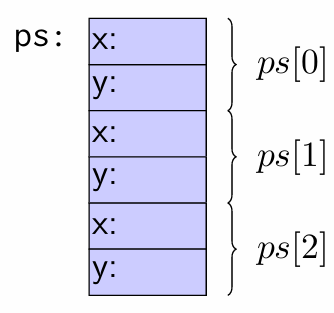

### Built-in arrays

#### Accessing a built-in array

Create pointer reference:

In [ ]:
float f[4]; // 4 floats
float* pf;  // pointer to a float

pf = f;     // pointer to the float array

// can also be written as:
pf = &f[0];

Accessing a value using pointer:

In [ ]:
float x = *(pf+3);
// or
x = pf[3]

Accessing a value using variable name:

In [ ]:
x = f[3]

#### Array zeroing

Using pointers:

In [ ]:
void zero(int* x, size_t n) {
    for (int* p=x; p!= x+n; ++p)
        *p = 0;
}

int main() {
    int a[5];
    zero(a,5);
}

Using variable names:

In [ ]:
void zero(int x[x], size_t n) {
    for (size_t i=0; i < n; ++i)
        x[i] = 0;
}

#### Strings

In [ ]:
char s[6] = "Hello";

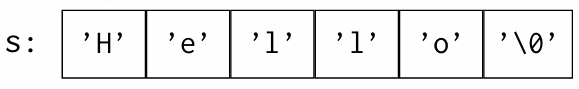

### std

* More functionality
* Safety net

Example:

In [ ]:
# include < iostream >
# include < string >
using std :: string ;
using std :: cout ;
using std :: endl ;

string make_email ( string fname ,
                    string lname ,
                    const string & domain )
{
    fname [0] = toupper ( fname [0]);
    lname [0] = toupper ( lname [0]);
    return fname + ’. ’ + lname + ’@ ’ + domain ;
}
void test_string ()
{
    string sr = make_email ( " sven " , " robertz " , " cs . lth . se " );
    cout << sr << endl ;
}

#### Initialization

In [ ]:
# include < iostream >
# include < string >
using std :: string ;
using std :: cout ;
using std :: endl ;

void print_vec ( const std :: string & s , const std :: vector <int >& v )
{
    std :: cout << s << " : " ;
    for (int e : v ) {
    std :: cout << e << " " ;
    }
    std :: cout << std :: endl ;
}
void test_vector_init ()
{
    std :: vector <int > x (7);
    print_vec ( " x " , x );
    // prints x: 0 0 0 0 0 0 0

    std :: vector <int > y (7 ,5);
    print_vec ( " y " , y );
    // prints y: 5 5 5 5 5 5 5

    std :: vector <int > z {1 ,2 ,3};
    print_vec ( " z " , z );
    // prints z: 1 2 3
}

#### Insertion and comparison

push_back does insertions

In [ ]:
void test_vector_eq ()
{
    std::vector <int> x {1 ,2 ,3};
    std::vector <int> y;
    y.push_back (1);
    y.push_back (2);
    y.push_back (3);
    if( x == y ) {
        std :: cout << " equal " << std :: endl ;
    } else {
        std :: cout << " not equal " << std :: endl ;
    }
}


#### Check range

In [ ]:
vector<T>::at(size_type) // throws out_of_range

### Multi-dimensional arrays

In [ ]:
int ia[3][4]; // array of size 3; each element is an array of ints of size 4
// array of size 10; each element is a 20-element array whose elements are arrays of 30 ints
int arr[10][20][30] = {0}; // initialize all elements to 0

In [ ]:
int ia[3][4] = {    // three elements; each element is an array of size 4
{0, 1, 2, 3},       // initializers for the row indexed by 0
{4, 5, 6, 7},       // initializers for the row indexed by 1
{8, 9, 10, 11}      // initializers for the row indexed by 2
};

#### Looping multi-dimensional arrays

In [ ]:
constexpr size_t rowCnt = 3, colCnt = 4;

int ia[rowCnt][colCnt]; // 12 uninitialized elements

// for each row
for (size_t i = 0; i != rowCnt; ++i) {
    // for each column within the row
    for (size_t j = 0; j != colCnt; ++j) {
        // assign the element’s positional index as its value
        ia[i][j] = i * colCnt + j;
    }
}

##### Using for range

In [ ]:
size_t cnt = 0;
for (auto &row : ia)        // for every element in the outer array
    for (auto &col : row) { // for every element in the inner array
        col = cnt;          // give this element the next value
        ++cnt;              // increment cnt
    }

##### Using begin/end

In [ ]:
// p points to the first array in ia
for (auto p = begin(ia); p != end(ia); ++p) {
    // q points to the first element in an inner array
    for (auto q = begin(*p); q != end(*p); ++q)
        cout << *q << ’ ’;  // prints the int value to which q points
cout << endl;
}

## Iterator
Iterator generalized, works for any kind of sequences, that uses begin and last. Useful instead of iterating with pointers.

Standard library put requirements on iterators.

std::find requires for its arguments:

* Must be CopyConstructible and destructible
* EqualityComparable, to have operator!=
* Dereferencable, to have operator* (for reading)
* Incrementable, to have opeartor++

Often specified.

Example:

In [ ]:
template <typename T >
T * find ( T * first , T * last , const T & val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}

Instead:

In [ ]:
template <typename Iter , typename T >
Iter find ( Iter first , Iter last , const T & val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}


### Some types of iterators

con is one of the containers types:
* vektor
* deque
* list
...with element type T

In [ ]:
con<T>::iterator                //runs forward
con<T>::const_iterator          //runs forward, only for reading
con<T>::reverse_iterator        //runs backwards
con<T>::const_reverse_iterator  //runs backwards, only for reading

### istream_iterator
Example:

In [ ]:
# include < iterator >

stringstream ss { " 1 2 12 123 1234\ n17 \ n \ t42 " };

istream_iterator <int > iit ( ss );
istream_iterator <int > iit_end ;

while ( iit != iit_end ) {
    cout << * iit ++ << endl ;
}

// output:
1
2
12
123
1234
17
42

Useful because array types usually take iterator streams as parameters, eliminating the need to write your own while function.

Example:

In [ ]:
stringstream ss { " 1 2 12 123 1234\ n17 \ n \ r42 " };

istream_iterator <int > iit ( ss );
istream_iterator <int > iit_end ;

vector <int > v ( iit , iit_end );

for ( auto a : v ) {
    cout << a << " " ;
}
cout << endl ;


### Counting with istream_iterator
Example not using istream:

In [ ]:
istringstream ss { s };
int words {0};
string tmp ;
while ( ss >> tmp ) ++ words ;

But instead using istream:

In [ ]:
istringstream ss { s };
int words = distance ( istream_iterator < string >{ ss } ,
                        istream_iterator < string >{});

### min_element in iterator range
Works only for types with < operator
Example:

In [ ]:
int a[] {3 ,5 ,7 ,6 ,8 ,5 ,2 ,4};
auto ma = min_element( begin(a), end(a));
auto ma2 = min_element ( a +2 , a +4);
vector <int > v {3 ,5 ,7 ,6 ,8 ,5 ,2 ,4};
auto mv = min_element ( v . begin () , v . end ());

Overload compare operator, inside the min_element class:

In [ ]:
template < class FwdIt , class Compare >
FwdIt min_element ( FwdIt first , FwdIt last , Compare cmp)
{
    ...


Therefore add comparator parameter

In [ ]:
std :: vector < const char * > tl = { " strings " , " in " , " a " , " vector " };
Str_Less_Than lt ; // functor
cout << * min_element ( tl . begin () , tl . end () , lt );

Lambda:

In [ ]:
auto cf = []( const char * s , const char * t ){ return strcmp (s , t ) <0;};
cout << * min_element ( tl . begin () , tl . end () , cf );

### Insert iterators

In [ ]:
vector <int > v {1 , 2 , 3 , 4};

vector <int > e ;
std :: copy ( v . begin () , v . end () , std :: back_inserter ( e ));
print_seq ( e );
// length = 4: [1][2][3][4]

deque <int > e2 ;
std :: copy ( v . begin () , v . end () , std :: front_inserter ( e2 ));
print_seq ( e2 );
// length = 4: [4][3][2][1]

std :: copy ( v . begin () , v . end () , std :: inserter ( e2 , e2 . end ()));
print_seq ( e2 );
// length = 8: [4][3][2][1][1][2][3][4]

## Streams

### Streams as function parameters
Example:

In [ ]:
tr.print(std::cout);    //in main

// in function
void TagRemover::print(std::ostream& output) {
    output << text << "\n";
}

In this example, the stream std::cout is an output stream. In the function, the input parameter should therefore be of a stream type with output. Just track if the stream handles << or >>, switch ostream to istream.

### System print

In [ ]:
# include <iostream>

int main() {
    std::cout << "Hello World!";
    return 0;
}

### User input

In [ ]:
std::cin >> v.elem[2];

### Read from stream
Example:

In [ ]:
TagRemover::TagRemover(std::istream& input) {
    string str;
    while (getline(input, str)) {
        text += str;
    }
}

### String to stream
Example:

In [ ]:
#include <sstream>
using namespace std;

string str = "example string";
istringstream example_stream(str)

## Bitset
A library that represents a flexibly sized collection of bits

### Bitfield
A bit-field holds a specified number of bits.

Example:

#### Using Bit-fields
A bit-field is accessed in much the same way as the other data members of a class:

Bit-fields with more than one bit are usually manipulated using the built-in bitwise
operators

Classes that define bit-field members also usually define a set of inline member
functions to test and set the value of the bit-field:

### Operators
Because there are no guarantees for how the sign bit is handled, we
strongly recommend using unsigned types with the bitwise operators, for example declaring:

In [ ]:
unsigned char bits;

In [ ]:
~   // bitwise not, generates a new value with the bits of its operand inverted
    // use: ~expr

<<  // left shift
    // use: expr1 << expr2

>>  // right shift
    // use: expr1 >> expr2

&   // bitwise AND, generates new values with the bit pattern composed from its two operands
    // use: expr1 & expr2

// Example:
unsigned char b1 = 0145;  // 0 1 1 0 0 1 0 1
unsigned char b2 = 0257;  // 1 0 1 0 1 1 1 1

b1 & b2 // 0 0 1 0 0 1 0 1

^   // bitwise XOR
    // use: expr1 ^ epxr2

// Example:
b1 ^ b2 // 1 1 0 0 1 0 1 0

|   // bitwise OR
    // use: expr1 | expr2

// Example:
b1 | b2 // 1 1 0 0 1 0 1 0

### Code examples

#### Implementing b[i]
bits is unsigned long

In [ ]:
Bitset::Bitset() : bits(0) {}

size_t Bitset::size() const {
	return BPW;
}

bool Bitset::operator[](size_t pos) const {
	return (bits & (1L << pos)) != 0;
}

BitReference Bitset::operator[](size_t pos) {
	return BitReference(&bits, pos);
}

Bitset::iterator Bitset::begin() {
	return Bitset::iterator(&bits,0);
}

Bitset::iterator Bitset::end() {
	return Bitset::iterator(&bits,size());
}

#### get()

In [ ]:
BitReference::operator bool() const {
	//
	// *** IMPLEMENT ***
	// This corresponds to the get() function in SimpleBitset.
	//
	// for b = bs[i]
	return (*p_bits & (1L << pos)) != 0;
}

#### set()

In [ ]:
BitReference& BitReference::operator=(bool b) {
	//
	// *** IMPLEMENT ***
	// This corresponds to the set() function in SimpleBitset.
	//
	// for bs[i] = b
	if (b) {
		*p_bits |= 1L << pos;
	} else {
		*p_bits &= ~ (1L << pos);
	}
	return *this;
}

#### bs[i] = bs[j]

In [ ]:
BitReference& BitReference::operator=(const BitReference& rhs) {
	// Same as operator=(bool), but the bit is picked from rhs
	//
	// for bs[i] = bs[j]

	bool a = (*p_bits & (1L << pos)) != 0;			//kollar om this är 1 eller 0 i pos
	bool b = (*rhs.p_bits & (1L << rhs.pos)) != 0;	//kollar om rhs är 1 eller 0 i pos
	
	if (!a && b) {
		// om this är 0 och rhs är 1, ansätter till 1 i this på pos
		*p_bits |= 1L << pos;
	} else if (a && !b) {
		// om this är 1 och rhs är 0, ansätter till 0 i this på pos
		*p_bits &= ~ (1L << pos);
	}
	
	return *this;
}

## Union
A union is a special kind of class. A union may have multiple data members, but
at any point in time, only one of the members may have a value. When a value is
assigned to one member of the union, all other members become undefined.

The
amount of storage allocated for a union is at least as much as is needed to contain
its largest data member.

A union may not inherit from another class, nor may a union be
used as a base class. As a result, a union may not have virtual functions.

### Defining a union

### Accessing a union type
The members of an object of union type are accessed using the normal member
access operators:

### Anonymous unions
The members of an anonymous union are directly accessible in the scope where
the anonymous union is defined

### Unions with members of class type
When we switch the union’s value to and from a member
of class type, we must construct or destroy that member, respectively: When we
switch the union to a member of class type, we must run a constructor for that
member’s type; when we switch from that member, we must run its destructor.

If a union member’s type defines one of these members, the compiler synthesizes the corresponding member of the union as deleted

### Using a class to manage union members
Because of the complexities involved in constructing and destroying members of
class type, unions with class-type members ordinarily are embedded inside another class. That way the class can manage the state transitions to and from the
member of class type

As an example, we’ll add a string member to our union.
We’ll define our union as an anonymous union and make it a member of a class
named Token. The Token class will manage the union’s members

To keep track of what type of value the union holds, we usually define a separate object known as a discriminant. A discriminant lets us discriminate among
the values that the union can hold

Our class
will define a member of an enumeration type (§ 19.3, p. 832) to keep track of the
state of its union member

We’ll use tok as our discriminant. When the union holds an int value, tok
will have the value INT; if the union has a string, tok will be STR; and so on

Because our union has a member with a destructor, we must define our own
destructor to (conditionally) destroy the string member. Unlike ordinary members of a class type, class members that are part of a union are not automatically
destroyed. The destructor has no way to know which type the union holds, so it
cannot know which member to destroy

Our destructor checks whether the object being destroyed holds a string. If
so, the destructor explicitly calls the string destructor (§ 19.1.2, p. 824) to free
the memory used by that string.

The destructor has no work to do if the union
holds a member of any of the built-in types (like int, char and so on... string is a library type)

### Implementing &operator=
For example tok = 5:

Once we’ve cleaned up the string member, we assign the given value to the
member that corresponds to the parameter type of the operator. In this case, our
parameter is an int, so we assign to ival. We update the discriminant and return

The string version differs from the others because
it must manage the transition to and from the string type:

The assignment operator must handle three possibilities for its string mem
ber: Both the left-hand and right-hand operands might be a string; neither oper
and might be a string;or one but not both operands might be a string:

### Copy constructor
The copy constructor and assignment
operators have to test the discriminant to know how to copy the given value. To
do this common work, we defined a member named copyUnion.


## Smaller features

### Swap

Note: If you've written a type specific swap, don't call std::swap, as this will instead use the library swap instead of your implementation.

For example:

### Lambda functions
* Capture
Specifies by value or reference
* Parameters
Like normal function declaration
* Return type

Example:
Second example, only a is declared, but uses x. Function searches for x in the rest of the code, hence 'capture'.

### Switch

### Range-for (for-each)
Called range for because std::for-each already in library, different name not to overload.

In [ ]:
std::vector<int> v {1,2,3,4};
for (int e : v) {
    std::cout << e << "\n";
}

### Comma operator
Lets you evaluate multiple expressions in a single statement, from left to right, returning only the value of the last one.

In [ ]:
int x = 0;
int result = (x = getValue(), x * 2);

### Type aliases
Can make code easier to read and write

Writing 'using' removes the need to write int_array[]... to define the properties of the variable, making the code more intuitive.

In [ ]:
using int_array = int[4]; // new style type alias declaration; see § 2.5.1 (p. 68)
typedef int int_array[4]; // equivalent typedef declaration; § 2.5.1 (p. 67)

// print the value of each element in ia, with each inner array on its own line
for (int_array *p = ia; p != ia + 3; ++p) {
    for (int *q = *p; q != *p + 4; ++q)
        cout << *q << ’ ’;
    cout << endl;
}

### For-loops

In [ ]:
for (int i = 1; i <= 5; ++i) {
    cout << i << " ";
}

### enum
Allows you to define named integer constants

In [ ]:
enum class Color { RED, GREEN, BLUE };

Color myColor = Color::GREEN;  // Must use Color:: prefix

### Type tracking

In [ ]:
if (typeid(*c) == typeid(Vector)) {
    ...
}

### Pair
Stores value pairs

In [ ]:
pair<string, string> anon;          // holds two strings
pair<string, size_t> word_count;    // holds a string and an size_t
pair<string, vector<int>> line;     // holds string and vector<int>

p.first
p.second
p1 relop p2     // relop = relational operator (<, =, >)

# Classes & struct

## Classes
Skrivs lämpligast i header filer

In [ ]:
// example

class bar {
    public:
        Bar(int v=100, bool b=false) :value{v}, flag{b} {}
    private:
        int value;
        bool flag;
}

In [ ]:
// default declaration

class Foo {
    public:
        Foo () =default;
    private:
        int value {0};
        bool flag {false};
}

### Example header file

### infdef

In [ ]:
#ifndef CLASSNAME_H
#define CLASSNAME_H

...

#endif

### Default constructor
A constructor that takes no arguments, using =default lets the compiler provide a default constructor by itself.

Example:

Below should be in the header file:

In [ ]:
 struct Sales_data {

    // constructors added
    Sales_data() = default;
    Sales_data(const std::string &s): bookNo(s) { }
    Sales_data(const std::string &s, unsigned n, double p):
    bookNo(s), units_sold(n), revenue(p*n) { }
    Sales_data(std::istream &);
    
    // other members as before
    std::string isbn() const { return bookNo; }
    Sales_data& combine(const Sales_data&);
    double avg_price() const;
    std::string bookNo;
    unsigned units_sold = 0;
    double revenue = 0.0;
 };

Then in the class file:

In [ ]:
Sales_data::Sales_data(const std::string &s) : bookNo(s) {}

Sales_data::Sales_data(const std::string &s, unsigned n, double p)
    : bookNo(s), units_sold(n), revenue(p * n) {}

Sales_data::Sales_data(std::istream &is) {
    double price = 0.0;
    is >> bookNo >> units_sold >> price;
    revenue = units_sold * price;
}

### Copy constructor

In [ ]:
class Foo {
    public:
    Foo(); // default constructor
    Foo(const Foo&); // copy constructor
    // ...
};

Synthesized:

In [ ]:
class Sales_data {
public:
    // other members and constructors as before
    // declaration equivalent to the synthesized copy constructor
    Sales_data(const Sales_data&);
private:
    std::string bookNo;
    int units_sold = 0;
    double revenue = 0.0;
};
// equivalent to the copy constructor that would be synthesized for Sales_data
    Sales_data::Sales_data(const Sales_data &orig):
    bookNo(orig.bookNo),            // uses the string copy constructor
    units_sold(orig.units_sold),    // copies orig.units_sold
    revenue(orig.revenue)           // copies orig.revenue
    {   }                           // empty body

### Destructor
A function that gets automatically called when deleting an object. Without a destructor, the compiler provides a default destructor.

In [ ]:
class Foo {
    public:
        ~Foo(); // destructor
        // ...
};

### Constructor delegation
Ha en huvud constructor, alla andra constructors nyttjar denna, fast i olika 'fall'

In [ ]:
class Sales_data {
    public:

    // nondelegating constructor initializes members from corresponding arguments
    Sales_data(std::string s, unsigned cnt, double price):
            bookNo(s), units_sold(cnt), revenue(cnt*price) { }

    // remaining constructors all delegate to another constructor
    Sales_data(): Sales_data("", 0, 0) {}
    Sales_data(std::string s): Sales_data(s, 0,0) {}
    Sales_data(std::istream &is): Sales_data()
                                    { read(is, *this); }
    // other members as before
 };

### Copy object
May use built in default copy constructors, but otherwise =default, or =delete

In [ ]:
// examples, a class bar
bar b1{}
bar b2{b1}

In [ ]:
class C {
    public:
        C(const C&);
}

### Operator overloading
(+ - < >) can be overloaded in member functions

Example in header file:

In [ ]:
friend std::ostream& operator<<(std::ostream& os);

// in class file

std::ostream& operator<<(std::ostream& os) {
    os << sieve.s;
}

Keep in mind the goal of the overload, what results to return, for example operator+ to return the sum of two classes, should return an object of that class.

#### operator[]
Example:

In [ ]:
// .cc fil
BitReference Bitset::operator[](size_t pos) {
	return BitReference(&bits, pos);
}

BitReference är return typen, Bitset::operator[]... betyder att den implementerar sin egen overload utifrån det som beskrivs i header filen, (size_t pos) visar vad som ska finnas i [].

### inline
Normally, when a function is called, there is an overhead of pushing arguments onto the stack, jumping to the function’s address, and then returning.

An inline function eliminates this overhead by directly inserting the function’s code where it is called.

In [ ]:
#include <iostream>

inline int square(int x) {
    return x * x;
}

int main() {
    std::cout << square(5) << std::endl; // No function call overhead
    return 0;
}

The compiler replaces square(5) with 5 * 5 in the compiled code.

### Friend function

In [ ]:
A friend function is a function that is not a member of a class but is granted access to its private members.

In [ ]:
#include <iostream>

class Box {
private:
    int width;

public:
    Box(int w) : width(w) {}

    // Declare a friend function
    friend void printWidth(Box b);
};

// Friend function definition
void printWidth(Box b) {
    std::cout << "Width: " << b.width << std::endl; // Accessing private member
}

int main() {
    Box box(10);
    printWidth(box); // Allowed because printWidth is a friend function
    return 0;
}

printWidth() is not a member of Box, but it can access width because it is declared as a friend.

### static members
The member value is shared throughout the class, and not individual to each object

In [ ]:
class Account {
public:
    void calculate() { amount += amount * interestRate; }
private:
    static double interestRate;
    // remaining members as before
};

## Structures

Data structures

### Creating structures

In [ ]:
struct test{
    test(int val1, int val2) :x(val1), y(val2) {} // constructor

    // saves values initialized in constructor
    int x;
    int y;

    // member function
    void print() {
        cout << "value x: " << x << "\n" << "value y: " << y << "\n";
    }

};

int main() {
    test f{55, 12};
    f.print();  // executes member function
}

### Accessing structures

In [ ]:
Vector v;
Vector& rv = v;
Vector* pv = &v;

int i = v.sz;   // direct access, using name of variable
int j = rv.sz;  // access via reference
int k = pv->sz; // access via pointer
// or
int k = (*p).x

## Name spaces
Functions made by users can share similar names as those built-in to other libraries. Primarily, the function that is called is first looked up into the class in which the object belongs to. So:

In [ ]:
test::Foo f(42);    // enters namespace test, creates an object f of class Foo.
test::print(f);     // enters namespace test, uses function print.

// if print does not exist in the class, uses one namespace above of test:
print(f);

// if a function is used without an object belonging to the class as a parameter:
print(1000);    // the class can't be found

//  'using' sets a name as standard for all
using test::print;
print(1000);    // no need to search if print is included in parameter class, always uses print belonging to test now.

### Creating a namespace

In [ ]:
namespace MyNamespace {
    void myFunction() {
        std::cout << "Hello from MyNamespace!" << std::endl;
    }

    int myVariable = 42;
}

// Using the namespace
int main() {
    MyNamespace::myFunction(); // Access the function
    std::cout << "myVariable: " << MyNamespace::myVariable << std::endl;
    return 0;
}

## Unnamed namespaces
Clash with global names

In [ ]:
namespace foo {
    void test() {
        cout << "foo::test() \n";
    }
}
namespace { // unnamed namespace
    void test() {
        cout << "::test()\n";
    }
}

In [ ]:
int main() {
    test();
    foo::test();
    ::test();
}

In [ ]:
// output
::test()
foo::test()
::test()

## Implementing iterators in your class
Structure:
* Your class
* It's corresponding iterator class

The general functionality is the following: The iterator has a type of its own class, with its own operator overloading which points to the next element ++, returning the value the class is currently at and so on. The constructor creates an object to be iterated through at position 0, and stores it as a reference. As ++ is used, the reference pos changes. It is this state of the reference that gets returned in the * dereferencer.

Example of 'your class':

In [ ]:
#ifndef BITSET_H
#define BITSET_H

#include <cstddef> /* size_t */
#include <limits>  /* numeric_limits */

class BitReference;
class BitsetIterator;                           // iterator

class Bitset {
	friend class BitReference;
	friend class BitsetIterator;                // iterator
public:
	Bitset();
	std::size_t size() const;
	bool operator[](std::size_t pos) const;
	BitReference operator[](std::size_t pos);
	

	using iterator = BitsetIterator;            // iterator
	iterator begin();                           // iterator
	iterator end();                             // iterator
	
private:
	using BitStorage = unsigned long;
	BitStorage bits;
	static const std::size_t
	    BPW = std::numeric_limits<BitStorage>::digits;
};

#endif

How begin() and end() is initialized in the .cc file:

In [ ]:
Bitset::iterator Bitset::begin() {
	return Bitset::iterator(&bits,0);
}

Bitset::iterator Bitset::end() {
	return Bitset::iterator(&bits,size());
}

In principal, returns an iterator of the same type as the iterator class, with input as the parameters of the current object to iterate on.

The return type must be of the iterator type, this case nicknamed iterator. This way, the intended usage becomes the following:

In [ ]:
Bitset bs;
auto it = bs.begin();

The constructor creates an object of type Bitset, but the return type of bs.begin() is an iterator.

Example of iterator class:

In [ ]:
#ifndef BITSET_ITERATOR_H
#define BITSET_ITERATOR_H

#include "bitreference.h"
#include <iterator>

class BitsetIterator : public std::iterator<std::forward_iterator_tag, bool> {
public:
	BitsetIterator(Bitset::BitStorage* pb, std::size_t p) : ref(pb, p) {}

    BitsetIterator(const BitsetIterator&) =default;

	bool operator!=(const BitsetIterator& bsi) const {
		if (ref.pos != bsi.ref.pos) {
			return true;
		} return false;
	}

	BitsetIterator& operator++() {
		++ref.pos;
		return *this;
	}

	BitReference operator*() {
		return BitReference(ref.p_bits,ref.pos);    // could use *ref, but BitReference doesnt
                                                    // have an operator* overload.
	}

	BitsetIterator& operator=(const BitsetIterator& rhs) {
		ref.p_bits = rhs.ref.p_bits;
		ref.pos = rhs.ref.pos;
		return *this;
	}
private:
	BitReference ref;
};

#endif

# Templates
Instead of unique code for several data types, for the same goal, create templates.

Example:

In [ ]:
#include <iostream>
using std::cout;
using std::endl;
using std::string;

#if 0
void print(int x)
{
    cout << x << "\n";
}

void print(const char* x)
{
    cout << x << "\n";
}

void print(string x)
{
    cout << x << "\n";
}
#else
template <typename T>       // template in question
void print(const T& x)
{
    cout << x << "\n";
}
#endif
struct Foo{
    int x;
};

std::ostream& operator<<(std::ostream& os, const Foo&)
{
    return os << "FOO!";
}
int main()
{
    auto x = 17;
    print(x);

    auto s = "hello";
    print(s);

    string t("testing");
    print(t);

    Foo f;
    print(f);
}

## Function template
Examples that I've used myself:

In [ ]:
template <typename T>
std::string toString(const T& object) {
	std::ostringstream buffer;
	buffer << object;

	return buffer.str();
}

In [ ]:
template<typename T>
T string_cast(std::string s) {
	std::istringstream buffer(s);
	T t;
	buffer >> t;
	return t;
}

In [ ]:
template <typename T >
T& find ( const Vector <T >& v , const T & val )
{
    if( v . size () == 0) throw std :: invalid_argument ( " empty vector " );
        for (int i =0; i < v . size (); ++ i ){
        if( v [ i ] == val ) return v [ i ];
    }
    throw std :: runtime_error ( " not found " );
}

Another example, 'find an element' to template:

In [ ]:
int * find ( int * first , int * last , int val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}

Template:

In [ ]:
template <typename T >
T * find ( T * first , T * last , const T & val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}

## Class template
Example:

In [ ]:
template <typename T >
class Vector {
private :
    T * elem ;
    int sz ;
public :
    explicit Vector ( int s );
    ~ Vector () { delete [] elem ;}

// copy and move ...

    T & operator []( int i );
    const T & operator []( int i ) const ;
    int size () const { return sz ;}
};

Using inheritance:

In [ ]:
//header
class Container {
public:
    virtual int size () const =0;
    virtual int& operator []( int o ) =0;
    virtual ~ Container () {}
    virtual void print () const =0;
};

class Vector : public Container {
public:
    explicit Vector ( int l );
    ~ Vector ();
    int size () const override ;
    int & operator []( int i ) override ;
    virtual void print () const override ;
private:
    int * p ;
    int sz ;
};


In [ ]:
//class
template <typename T >
class Container {
public :
    using value_type = T ;
    virtual size_t size () const =0;
    virtual T& operator []( size_t o ) =0;
    virtual ~ Container () {}
    virtual void print () const =0;
};

template <typename T >
class Vector : public Container <T> {
public :
    Vector ( size_t l = 0) : elem { new T[ l ]} , sz { l } {}
    ~ Vector () { delete [] elem ;}
    size_t size () const override { return sz ;}
    T& operator []( size_t i ) override { return elem [ i ];}
    virtual void print () const override ;
private :
    T * elem ;
    size_t sz ;
};


## Variadic template
A function template that takes variable number of arguments

In [ ]:
template <typename T, typename... Tail>
void println(const T& head, const Tail&... tail)
{
    cout << head << " ";    // prints head
    println(tail...);       // recursion for the rest
}

## Specific template examples

### Template metaprogramming
Compile-time computation

Example:

In [ ]:
template <int N>
 struct Factorial{
    static constexpr int value = N * Factorial<N-1>::value;
 };
 
 template <>
 struct Factorial<0>{
    static constexpr int value = 1;
 };
 
 int main()
 {
    std::cout << Factorial<5>::value>;
    return 0;
 }

A trick: you can get the results from compile-time by willingly creating an error

In [ ]:
template <int N>
 struct Factorial{
    static constexpr int value = N * Factorial<N-1>::value;
 };
 
 template <>
 struct Factorial<0>{
    static constexpr int value = 1;
 };
 
 void example()
 {
    Show<int, Factorial<5>::value>{};
 }

Show is declared, but not initiated. The error return shows the parameter that went wrong, but those parameters are computed at compile-time. So the error will show what it has computed!

A neat way to debug.

### Template list initializer
Generic for types

In [ ]:
Vector <int > vs {1 ,3 ,5 ,7 ,9}; //goal

template <typename T >
Vector <T >:: Vector ( std :: initializer_list <T > l )
                        : Vector <T >( static_cast <int >( l . size ()))
{
    std :: copy ( l . begin () , l . end () , elem );
}


### Template print
Unorthodox in c++ ways, in reality should just be of type which implements operator<< to use standard print function

In [ ]:
template <typename T >
void Vector <T >:: print () const
{
    for ( size_t i = 0; i != sz ; ++ i )
        cout << p [ i ] << " " ;
    cout << endl ;
}

For example, if using a type without operator<<:

In [ ]:
template <> //full specialization: no template arguments
void Vector <Foo >:: print () const
{
    for ( size_t i = 0; i != sz ; ++ i )
        cout << " Foo ( " <<p [ i ]. x << " ) " ;
    cout << endl ;
}

### Explicit type conversion
Ex:

In [ ]:
cout << compare<double>(i,d) << endl;

For readability, better to be explicit:

In [ ]:
cout << compare(static_cast<double>(i),d) << endl;

### Two template parameters
Ex:
First argument gives int, second gives double.

In [ ]:
template <typename T , typename U >
int compare2 ( const T & a , const U & b )
{
    if( a < b ) return -1;
    if( b < a ) return 1;
    return 0;
}

void example3 ()
{
    int i {5};
    double d {5.5};

    cout << compare2 (i , d ) << endl ; // -1
}


### Overloading templates with normal functions
Example class Name with no operator <

In [ ]:
const Name & minimum ( const Name & a , const Name & b )
{
    if( a . s < b . s )
        return a ;
    else
        return b ;
}

### Type tracking
Templates needs to track types in returns, for example if no common operator for the types exist, use common_type

In [ ]:
template <typename T , typename U >
auto
minimum ( const T & a , const U & b ) -> decltype ( a + b );

adds the unnecessary requirement that there is an operator+.

Better:

In [ ]:
# include <type_traits>

template <typename T, typename U>
std::common_type<T, U>::type
minimum(const T& a ,const U& b);

std::common_type<T,U>::type is
a type that T and U can be implicitly converted to If no such a type
exists, there is no member type.

# Abstract classes
Like inheritance in java
Example:

In [ ]:
class Container {
public :
    virtual int size () const =0;           //=0, no implementation, purely virtual
    virtual int & operator []( int o ) =0;
    virtual ~ Container () = default ;
    // copy and move ...
};

In [ ]:
class Vector : public Container {
public :
    Vector ( int l = 0) : p { new int [ l ]} , sz { l } {}
    ~ Vector () { delete [] elem ;}                             //important that destructor is virtual in abstract class, then implement...
    int size () const override { return sz ;}                   //...the destructor in virtual class
    int & operator []( int i ) override { return elem [ i ];}   //override -> use virtual class implementation
private :
    int * elem ;
    int sz ;
}; 

## Using
Constructors are not inherited. To use the virtual class definition:

In [ ]:
class Base {
public :
    Base (int i ) : x { i } {}  //no default constructor
    virtual void print () { cout << " Base : " << x << endl ;}
private :
    int x ;
};

class Derived : public Base {
    using Base :: Base ;
};
    void test_ctors () {
    Derived b (5);  // OK !
    Derived b2 ;    // use of deleted function Derived :: Derived ()
    b . print ();
}


Note above: no default constructor, so Derived b2 doesn't work, the inherited constructor wants an int.

Instead:

In [ ]:
class Base {
public :
    Base (int i=0 ) : x { i } {}  //default constructor added!
    virtual void print () { cout << " Base : " << x << endl ;}
private :
    int x ;
};

class Derived : public Base {
    using Base :: Base ;
};
    void test_ctors () {
    Derived b (5);  // OK !
    Derived b2 ;    // OK !
    b . print ();
}

OBS: If the abstract class has a function print(), and it is not implemented in the derived class, the abstract definition will be used when called, same as 'using', but this is NOT the case for constructors, as constructors are NOT inherited.

## Synthesized constructors
Example:

In [ ]:
// in the abstract class
Base::Base(int a, int b, int c);

In the derived class, 'using' leads to four constructors, one for every parameter implemented

## Destructors
Needs to be virtual.

Bad example:

In [ ]:
struct Base {
    Base () = default ;
    ~ Base () = default ;       //not virtual
    virtual void do_stuff ();
    ...
};

struct Derived : public Base {
    Derived () : Base () , f {new Foo ()) {}
    ~ Derived () { delete f ;}
    void do_stuff ();
    ...
private :
    Foo * f
};


p has type Base*, the destructor for Base is run when delete p is called. If that destructor is not virtual, then the destructor of Base is run instead of Derived, can lead to memory leak.

## Accesibility

In [ ]:
class C {
public :
    // Members accessible from any function
protected :
    // Members accessible from member functions
    // in the class or a derived class
private :
    // Members accessible only from member functions
    // in the class
};

Implementation in derived class:

In [ ]:
class D1 : public B { // Public inheritance
    // ...
};
class D2 : protected B { // Protected inheritance
    // ...
};
class D3 : private B { // Private inheritance
    // ...
};


## Instanciating abstract types/classes
You can't make instances of abstract types/classes, must use pointers and references.

Example wrong:

In [ ]:
int main ()
{
    Dog d ;
    Cat c ;
    Bird b ;
    Cow w ;

    std :: vector < Animal > zoo {d ,c ,b , w };

    for ( auto x : zoo ){
        x.speak ();
    };
}


Example right:

In [ ]:
int main ()
{
    Dog d ;
    Cat c ;
    Bird b ;
    Cow w ;

    std :: vector < Animal* > zoo {&d ,&c ,&b , &w };

    for ( auto x : zoo ){
        x->speak();
    };
}

## Type conversion when using abstract classes
static_cast has no safety net, use dynamic_cast instead.

Example:

In [ ]:
Vector v;
Container* c = &v;

if(dynamic_cast<Vector*>(c)) {
    cout << " *c instanceof Vector\n" ;
}


## = and copying
Example:

In [ ]:
Point3d b1 ;
Point3d b2 ;
Point & point_ref = b2 ;
point_ref = b1 ;
// point_ref only copied the Point part of b1

Because point_ref is of type Point, when = with a subclass, the Point type reference only looks at the Point type values.

Solution is to make a virtual operator=:

In [ ]:
struct Point {
    . . .
    virtual Point & operator =( const Point & p ) = default ;
};

struct Point3d : public Point {
    . . .
    virtual Point3d & operator =( const Point & p );
};

Point3d & Point3d :: operator =( const Point & p )
{
    Point :: operator =( p );
    auto p3d = dynamic_cast < const Point3d * >(& p );
    if( p3d ){
        z = p3d - > z ;
    } else {
    z = 0;
    }
    return * this ;
}

# Error handling

## try-catch

In [ ]:
try {
    // code that may throw
}
catch (some exception) {
    // code handling
}
catch (another exception) {
    // code handling
}
catch (...) {
    // handles anything
}

## throw

In [ ]:
...
if (sz <0) throw length_error("negative size");

## custom exceptions

Creating custom exception:

In [ ]:
struct MyOwnException{
    MyOwnException(const std::string& msg, int val)
            : m{msg}, val{val} {}
        std::string m;
        int v;
}

Using custom exception:

In [ ]:
void f() {
    throw MyOwnException("An error occured", 17);
}

void test1() {
    try{
        f();
    } catch(MyOwnException &e) {
        cout << "Exception: " << e.m << " - " << e.v << end1;
    }
}

## noexcept
Ignores exceptions

In [ ]:
struct Foo {
    void f();
    void g() noexcept;
}

## static_assert
Checks in compile time. Also contains meta functions in standard library, for more specific checks.

In [ ]:
int foo(int x) {
    static_assert(some_param > 100, "");
    return 2*x;
}